In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datatrain = pd.read_csv("credit_train.csv")

In [3]:
datatrain.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
datatest = pd.read_csv("credit_test.csv")

In [5]:
datatest.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [6]:
#making copy of original data
original_train = datatest.copy()
original_test = datatrain.copy()

In [7]:
datatrain.columns = datatrain.columns.str.replace(' ', '') #Removing white space so it would be easier to execute code 

In [8]:
datatest.columns = datatest.columns.str.replace(' ', '') #Removing white space so it would be easier to execute code 

In [9]:
datatrain.describe()

,CurrentLoanAmount,CreditScore,AnnualIncome,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [10]:
datatest.describe()

,CurrentLoanAmount,CreditScore,AnnualIncome,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [11]:
datatrain.columns

Index(['LoanID', 'CustomerID', 'LoanStatus', 'CurrentLoanAmount', 'Term',
       'CreditScore', 'AnnualIncome', 'Yearsincurrentjob', 'HomeOwnership',
       'Purpose', 'MonthlyDebt', 'YearsofCreditHistory',
       'Monthssincelastdelinquent', 'NumberofOpenAccounts',
       'NumberofCreditProblems', 'CurrentCreditBalance', 'MaximumOpenCredit',
       'Bankruptcies', 'TaxLiens'],
      dtype='object')

In [12]:
datatest.columns

Index(['LoanID', 'CustomerID', 'CurrentLoanAmount', 'Term', 'CreditScore',
       'AnnualIncome', 'Yearsincurrentjob', 'HomeOwnership', 'Purpose',
       'MonthlyDebt', 'YearsofCreditHistory', 'Monthssincelastdelinquent',
       'NumberofOpenAccounts', 'NumberofCreditProblems',
       'CurrentCreditBalance', 'MaximumOpenCredit', 'Bankruptcies',
       'TaxLiens'],
      dtype='object')

In [13]:
# Maximum credit score is supposed to be 850
# There are credit score more than 850, upon checking in it looks like an extra zero was added to some credit score
# Dividing those credit score by 10 made the credit score more accurate.
for i in range(len(datatrain["CreditScore"])):
    if datatrain["CreditScore"][i] > 850:
        datatrain['CreditScore'][i] = datatrain["CreditScore"][i]/10
print(datatrain["CreditScore"])

<ipython-input-13-e44f47e344ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatrain['CreditScore'][i] = datatrain["CreditScore"][i]/10


0         709.0
1           NaN
2         741.0
3         721.0
4           NaN
          ...  
100509      NaN
100510      NaN
100511      NaN
100512      NaN
100513      NaN
Name: CreditScore, Length: 100514, dtype: float64


In [14]:
datatrain.describe()

,CurrentLoanAmount,CreditScore,AnnualIncome,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [15]:
#doing same for datatest
#Maximum credit score is supposed to be 850
# There are credit score more than 850, upon checking in it looks like an extra zero was added to some credit score
# Dividing those credit score by 10 made the credit score more accurate.
for i in range(len(datatest["CreditScore"])):
    if datatest["CreditScore"][i] > 850:
        datatest['CreditScore'][i] = datatest["CreditScore"][i]/10
print(datatest["CreditScore"])

<ipython-input-15-efecbb6bd7c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['CreditScore'][i] = datatest["CreditScore"][i]/10


0        747.0
1        734.0
2        709.0
3        727.0
4        744.0
         ...  
10348      NaN
10349      NaN
10350      NaN
10351      NaN
10352      NaN
Name: CreditScore, Length: 10353, dtype: float64


In [16]:
datatest.describe()

,CurrentLoanAmount,CreditScore,AnnualIncome,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,716.631251,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,28.233359,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,704.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,723.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,739.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [17]:
datatrain.dtypes

LoanID                        object
CustomerID                    object
LoanStatus                    object
CurrentLoanAmount            float64
Term                          object
CreditScore                  float64
AnnualIncome                 float64
Yearsincurrentjob             object
HomeOwnership                 object
Purpose                       object
MonthlyDebt                  float64
YearsofCreditHistory         float64
Monthssincelastdelinquent    float64
NumberofOpenAccounts         float64
NumberofCreditProblems       float64
CurrentCreditBalance         float64
MaximumOpenCredit            float64
Bankruptcies                 float64
TaxLiens                     float64
dtype: object

In [18]:
datatrain.shape

(100514, 19)

In [19]:
datatest.shape

(10353, 18)

In [20]:
datatrain.isnull().sum()

LoanID                         514
CustomerID                     514
LoanStatus                     514
CurrentLoanAmount              514
Term                           514
CreditScore                  19668
AnnualIncome                 19668
Yearsincurrentjob             4736
HomeOwnership                  514
Purpose                        514
MonthlyDebt                    514
YearsofCreditHistory           514
Monthssincelastdelinquent    53655
NumberofOpenAccounts           514
NumberofCreditProblems         514
CurrentCreditBalance           514
MaximumOpenCredit              516
Bankruptcies                   718
TaxLiens                       524
dtype: int64

In [21]:
datatest.isnull().sum()

LoanID                        353
CustomerID                    353
CurrentLoanAmount             353
Term                          353
CreditScore                  2334
AnnualIncome                 2334
Yearsincurrentjob             780
HomeOwnership                 353
Purpose                       353
MonthlyDebt                   353
YearsofCreditHistory          353
Monthssincelastdelinquent    5659
NumberofOpenAccounts          353
NumberofCreditProblems        353
CurrentCreditBalance          353
MaximumOpenCredit             353
Bankruptcies                  375
TaxLiens                      354
dtype: int64

In [22]:
datatrain = datatrain[datatrain["LoanID"].notnull()]

In [23]:
datatest = datatest[datatest["LoanID"].notnull()]

In [24]:
datatrain.isnull().sum()


LoanID                           0
CustomerID                       0
LoanStatus                       0
CurrentLoanAmount                0
Term                             0
CreditScore                  19154
AnnualIncome                 19154
Yearsincurrentjob             4222
HomeOwnership                    0
Purpose                          0
MonthlyDebt                      0
YearsofCreditHistory             0
Monthssincelastdelinquent    53141
NumberofOpenAccounts             0
NumberofCreditProblems           0
CurrentCreditBalance             0
MaximumOpenCredit                2
Bankruptcies                   204
TaxLiens                        10
dtype: int64

In [25]:
datatest.isnull().sum()

LoanID                          0
CustomerID                      0
CurrentLoanAmount               0
Term                            0
CreditScore                  1981
AnnualIncome                 1981
Yearsincurrentjob             427
HomeOwnership                   0
Purpose                         0
MonthlyDebt                     0
YearsofCreditHistory            0
Monthssincelastdelinquent    5306
NumberofOpenAccounts            0
NumberofCreditProblems          0
CurrentCreditBalance            0
MaximumOpenCredit               0
Bankruptcies                   22
TaxLiens                        1
dtype: int64

In [26]:
datatrain = datatrain[datatrain["Bankruptcies"].notnull()]

In [27]:
datatrain = datatrain[datatrain["TaxLiens"].notnull()]

In [28]:
datatest = datatest[datatest["Bankruptcies"].notnull()]
datatest = datatest[datatest["TaxLiens"].notnull()]

In [29]:
datatrain.isnull().sum()

LoanID                           0
CustomerID                       0
LoanStatus                       0
CurrentLoanAmount                0
Term                             0
CreditScore                  19112
AnnualIncome                 19112
Yearsincurrentjob             4222
HomeOwnership                    0
Purpose                          0
MonthlyDebt                      0
YearsofCreditHistory             0
Monthssincelastdelinquent    53140
NumberofOpenAccounts             0
NumberofCreditProblems           0
CurrentCreditBalance             0
MaximumOpenCredit                2
Bankruptcies                     0
TaxLiens                         0
dtype: int64

In [30]:
datatest.isnull().sum()

LoanID                          0
CustomerID                      0
CurrentLoanAmount               0
Term                            0
CreditScore                  1978
AnnualIncome                 1978
Yearsincurrentjob             427
HomeOwnership                   0
Purpose                         0
MonthlyDebt                     0
YearsofCreditHistory            0
Monthssincelastdelinquent    5306
NumberofOpenAccounts            0
NumberofCreditProblems          0
CurrentCreditBalance            0
MaximumOpenCredit               0
Bankruptcies                    0
TaxLiens                        0
dtype: int64

In [31]:
#Using mean to fill the numerical variable datatrain
datatrain.CreditScore = datatrain.CreditScore.fillna(datatrain.CreditScore.mean())
datatrain.AnnualIncome = datatrain.AnnualIncome.fillna(datatrain.AnnualIncome.mean())
datatrain.Monthssincelastdelinquent = datatrain.Monthssincelastdelinquent.fillna(datatrain.Monthssincelastdelinquent.mean())

#Using same method.....mean to fill the numerical variable for datatest
datatest.CreditScore = datatest.CreditScore.fillna(datatest.CreditScore.mean())
datatest.AnnualIncome = datatest.AnnualIncome.fillna(datatest.AnnualIncome.mean())
datatest.Monthssincelastdelinquent = datatest.Monthssincelastdelinquent.fillna(datatest.Monthssincelastdelinquent.mean())



In [32]:
#Removing "Years" from the column to make it numerical  value instead of categorical 
datatrain["Yearsincurrentjob"] = datatrain["Yearsincurrentjob"].str.extract('(\d+)', expand= False)
datatest["Yearsincurrentjob"] = datatest["Yearsincurrentjob"].str.extract('(\d+)', expand= False)

#Converting data type to float to get the mean value and fill the missng value with it. 
datatrain['Yearsincurrentjob'] = datatrain['Yearsincurrentjob'].astype(float, errors = 'raise')
datatest['Yearsincurrentjob'] = datatest['Yearsincurrentjob'].astype(float, errors = 'raise')


In [33]:
datatrain.Yearsincurrentjob = datatrain.Yearsincurrentjob.fillna(datatrain.Yearsincurrentjob.mean())
datatest.Yearsincurrentjob = datatest.Yearsincurrentjob.fillna(datatest.Yearsincurrentjob.mean())

In [34]:
datatrain.isnull().sum()

LoanID                       0
CustomerID                   0
LoanStatus                   0
CurrentLoanAmount            0
Term                         0
CreditScore                  0
AnnualIncome                 0
Yearsincurrentjob            0
HomeOwnership                0
Purpose                      0
MonthlyDebt                  0
YearsofCreditHistory         0
Monthssincelastdelinquent    0
NumberofOpenAccounts         0
NumberofCreditProblems       0
CurrentCreditBalance         0
MaximumOpenCredit            2
Bankruptcies                 0
TaxLiens                     0
dtype: int64

In [35]:
datatest.isnull().sum()

LoanID                       0
CustomerID                   0
CurrentLoanAmount            0
Term                         0
CreditScore                  0
AnnualIncome                 0
Yearsincurrentjob            0
HomeOwnership                0
Purpose                      0
MonthlyDebt                  0
YearsofCreditHistory         0
Monthssincelastdelinquent    0
NumberofOpenAccounts         0
NumberofCreditProblems       0
CurrentCreditBalance         0
MaximumOpenCredit            0
Bankruptcies                 0
TaxLiens                     0
dtype: int64

<AxesSubplot:>

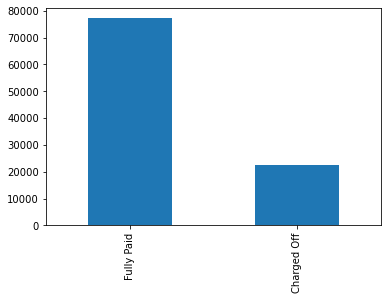

In [36]:
datatrain["LoanStatus"].value_counts().plot.bar()

In [37]:
datatrain["LoanStatus"].value_counts(normalize=True) 

Fully Paid     0.773648
Charged Off    0.226352
Name: LoanStatus, dtype: float64

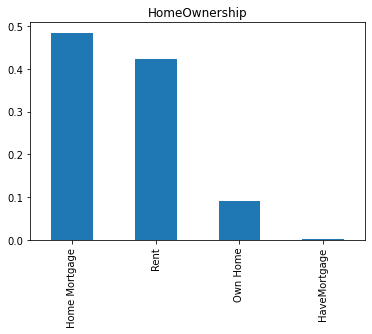

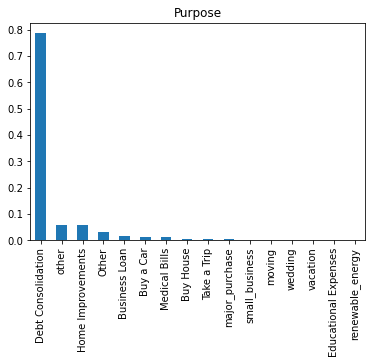

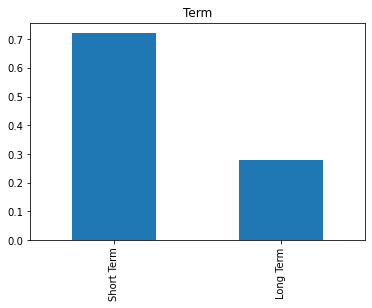

In [38]:
#Plotting independent variable
datatrain["HomeOwnership"].value_counts(normalize=True).plot.bar(title="HomeOwnership")
plt.show()
datatrain["Purpose"].value_counts(normalize=True).plot.bar(title="Purpose")
plt.show()
datatrain["Term"].value_counts(normalize=True).plot.bar(title="Term")
plt.show()

<AxesSubplot:>

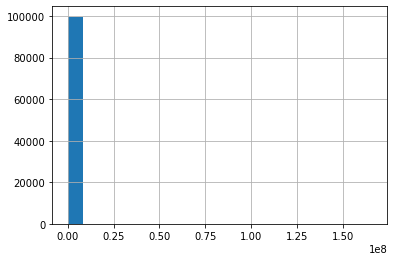

In [39]:
datatrain["AnnualIncome"].hist(bins=20)

<AxesSubplot:>

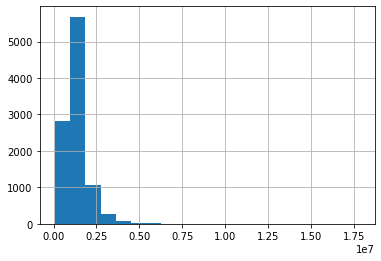

In [40]:
datatest["AnnualIncome"].hist(bins=20)

In [41]:
#normalizing Annual Income
datatrain["AnnualIncome_log"] = np.log(datatrain["AnnualIncome"])
datatest["AnnualIncome_log"] = np.log(datatest["AnnualIncome"])

<AxesSubplot:>

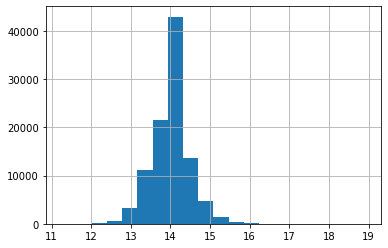

In [42]:
datatrain["AnnualIncome_log"].hist(bins=20)

<AxesSubplot:>

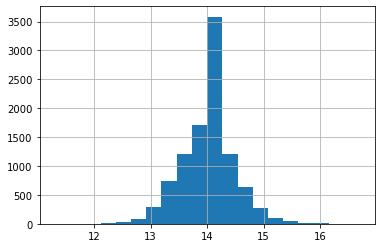

In [43]:
datatest["AnnualIncome_log"].hist(bins=20)

<AxesSubplot:>

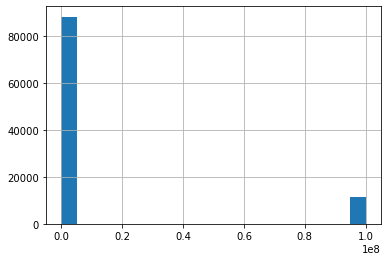

In [44]:
datatrain["CurrentLoanAmount"].hist(bins=20)

<AxesSubplot:>

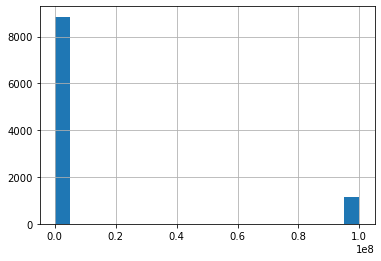

In [45]:
datatest["CurrentLoanAmount"].hist(bins=20)

In [46]:
#normalizing Annual Income
datatrain["CurrentLoanAmount_log"] = np.log(datatrain["CurrentLoanAmount"])
datatest["CurrentLoanAmount_log"] = np.log(datatest["CurrentLoanAmount"])

<AxesSubplot:>

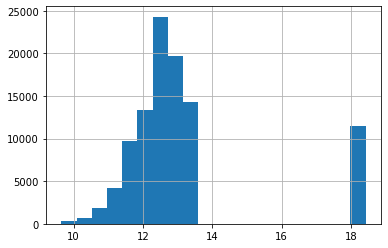

In [47]:
datatrain["CurrentLoanAmount_log"].hist(bins=20)

<AxesSubplot:>

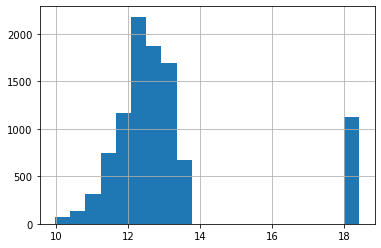

In [48]:
datatest["CurrentLoanAmount_log"].hist(bins=20)

<AxesSubplot:>

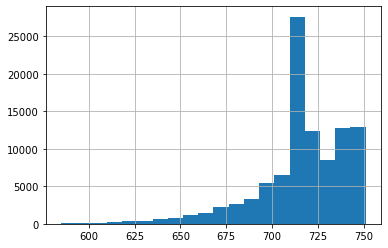

In [49]:
datatrain["CreditScore"].hist(bins=20)

In [50]:
datatrain["CreditScore_log"] = np.log(datatrain["CreditScore"])
datatest["CreditScore_log"] = np.log(datatrain["CreditScore"])

<AxesSubplot:>

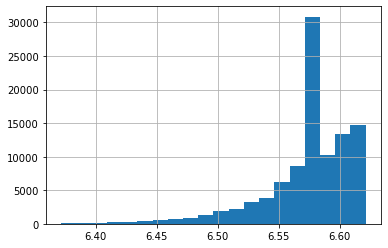

In [51]:
datatrain["CreditScore_log"].hist(bins=20)

<AxesSubplot:>

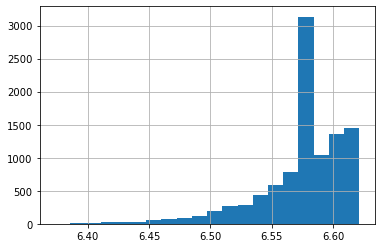

In [52]:
datatest["CreditScore_log"].hist(bins=20)

In [53]:
datatrain["LoanStatus"] = datatrain['LoanStatus'].replace(['Fully Paid', 'Charged Off'], ['Y', 'N'])

In [54]:
pd.crosstab(datatrain['AnnualIncome'], datatrain['LoanStatus'], margins =True)

LoanStatus,N,Y,All
AnnualIncome,,,
76627.0,1,0,1
81092.0,0,1,1
94867.0,0,1,1
106533.0,0,1,1
111245.0,0,2,2
...,...,...,...
28095300.0,0,1,1
30838995.0,1,0,1
36475440.0,0,1,1


# finding relation between target variable and catagorical independent variable

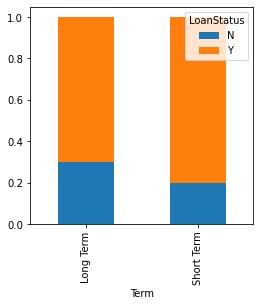

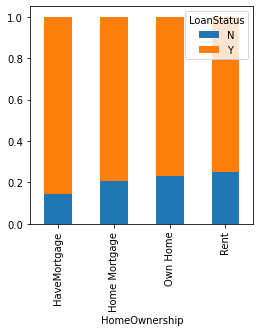

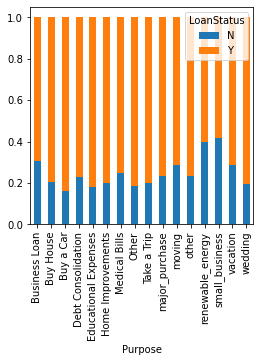

In [55]:
Term=pd.crosstab(datatrain["Term"],datatrain["LoanStatus"])
Term.div(Term.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

HomeOwnership=pd.crosstab(datatrain["HomeOwnership"],datatrain["LoanStatus"])
HomeOwnership.div(HomeOwnership.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Purpose=pd.crosstab(datatrain["Purpose"],datatrain["LoanStatus"])
Purpose.div(Purpose.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


<AxesSubplot:>

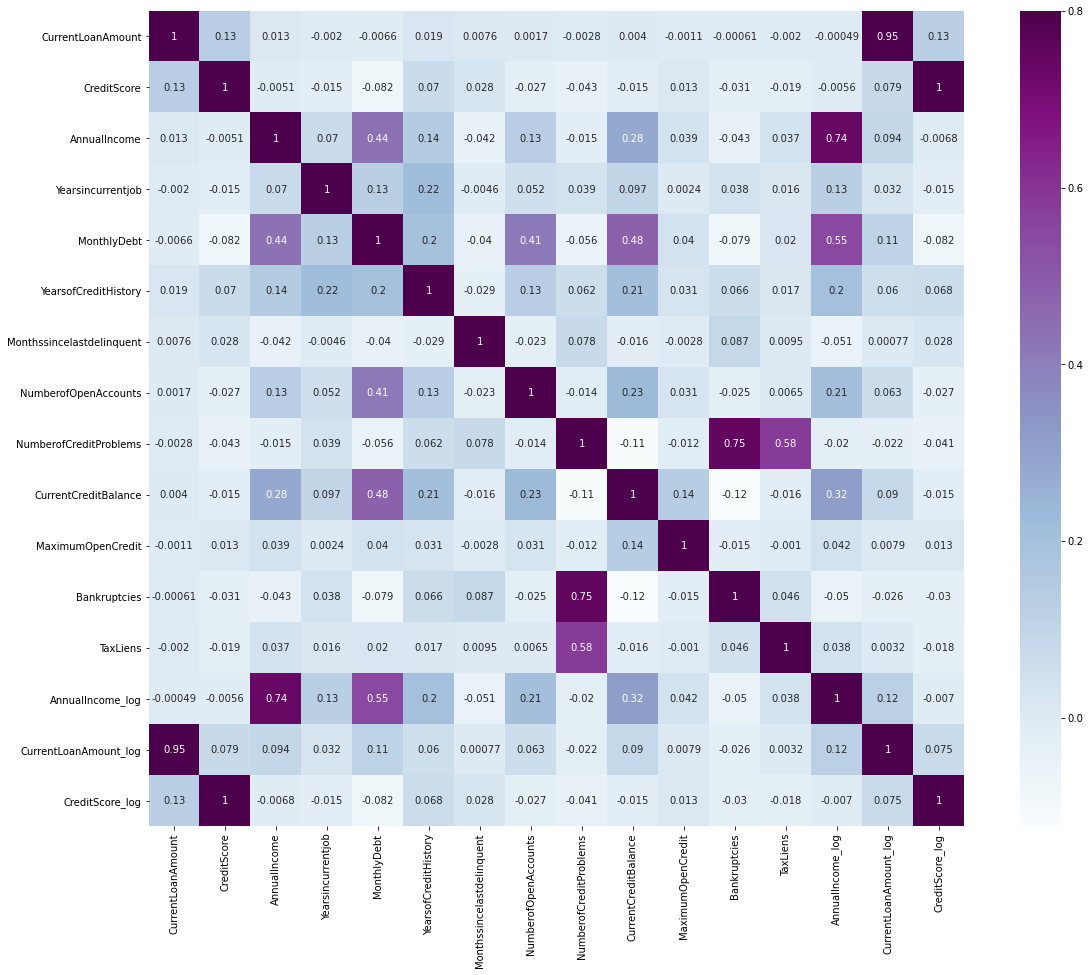

In [56]:
matrix = datatrain.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


In [57]:
datatrain["LoanStatus"].replace("N", 0,inplace=True)
datatrain["LoanStatus"].replace("Y", 1,inplace=True)

datatrain['LoanStatus'] = datatrain['LoanStatus'].astype(float, errors = 'raise')

<AxesSubplot:>

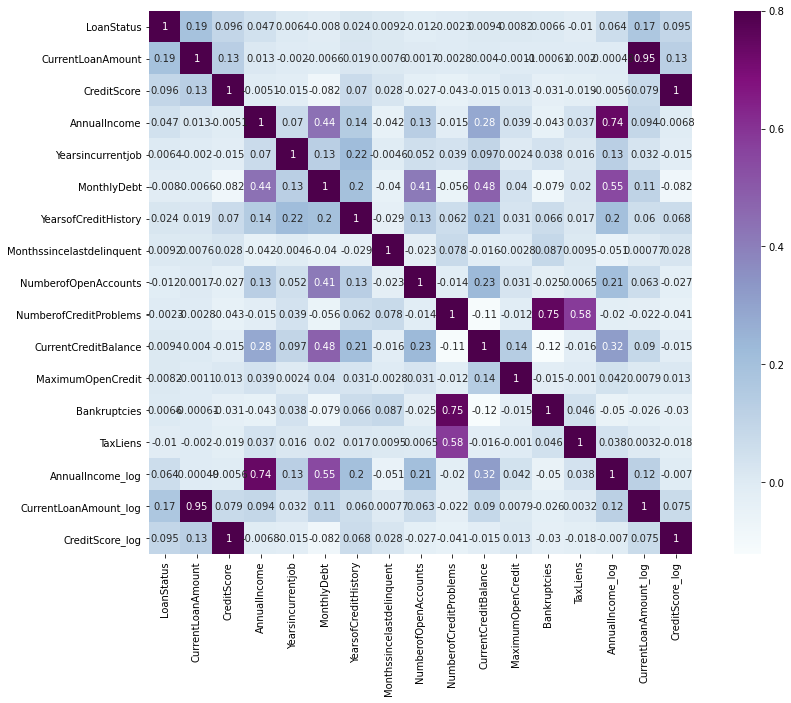

In [58]:
matrix = datatrain.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


#LoanStatus and current loan amount are slightly co-related. Bankruptcies and number of credit problem are highly co-related, so is taxlines and number of credit problem. Monthly debty and curret credit balance are corelated too. Current credit card balance and Number of open account are co-related to monthly debt.

# Model Building : Part I

In [59]:
datatrain.head()

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,...,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens,AnnualIncome_log,CurrentLoanAmount_log,CreditScore_log
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1.0,445412.0,Short Term,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,...,34.988447,6.0,1.0,228190.0,416746.0,1.0,0.0,13.970369,13.006755,6.563856
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1.0,262328.0,Short Term,716.278506,1.378344e+06,10.0,Home Mortgage,Debt Consolidation,...,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,14.136394,12.477351,6.574069
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1.0,99999999.0,Short Term,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,...,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,14.618360,18.420681,6.608001
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1.0,347666.0,Long Term,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,...,34.988447,9.0,0.0,256329.0,386958.0,0.0,0.0,13.601016,12.758998,6.580639
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1.0,176220.0,Short Term,716.278506,1.378344e+06,5.0,Rent,Debt Consolidation,...,34.988447,15.0,0.0,253460.0,427174.0,0.0,0.0,14.136394,12.079488,6.574069


In [60]:
#droping loan_id and customerid since it does not effect loan status
datatrain = datatrain.drop("LoanID",axis=1)
datatrain = datatrain.drop("CustomerID",axis=1)
datatest = datatest.drop("LoanID",axis=1)
datatest = datatest.drop("CustomerID",axis=1)

In [61]:
#droping target variable from training database for scikit-learn
X = datatrain.drop("LoanStatus",1)
Y = datatrain.LoanStatus

In [62]:
X

,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens,AnnualIncome_log,CurrentLoanAmount_log,CreditScore_log
0,445412.0,Short Term,709.000000,1.167493e+06,8.000000,Home Mortgage,Home Improvements,5214.74,17.2,34.988447,6.0,1.0,228190.0,416746.0,1.0,0.0,13.970369,13.006755,6.563856
1,262328.0,Short Term,716.278506,1.378344e+06,10.000000,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,14.136394,12.477351,6.574069
2,99999999.0,Short Term,741.000000,2.231892e+06,8.000000,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,14.618360,18.420681,6.608001
3,347666.0,Long Term,721.000000,8.069490e+05,3.000000,Own Home,Debt Consolidation,8741.90,12.0,34.988447,9.0,0.0,256329.0,386958.0,0.0,0.0,13.601016,12.758998,6.580639
4,176220.0,Short Term,716.278506,1.378344e+06,5.000000,Rent,Debt Consolidation,20639.70,6.1,34.988447,15.0,0.0,253460.0,427174.0,0.0,0.0,14.136394,12.079488,6.574069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,Short Term,725.000000,4.754370e+05,7.000000,Own Home,other,2202.86,22.3,34.988447,5.0,0.0,47766.0,658548.0,0.0,0.0,13.071990,11.898664,6.586172
99996,99999999.0,Short Term,732.000000,1.289416e+06,1.000000,Rent,Debt Consolidation,13109.05,9.4,21.000000,22.0,0.0,153045.0,509234.0,0.0,0.0,14.069700,18.420681,6.595781
99997,103136.0,Short Term,742.000000,1.150545e+06,6.000000,Rent,Debt Consolidation,7315.57,18.8,18.000000,12.0,1.0,109554.0,537548.0,1.0,0.0,13.955746,11.543804,6.609349
99998,530332.0,Short Term,746.000000,1.717524e+06,9.000000,Rent,Debt Consolidation,9890.07,15.0,34.988447,8.0,0.0,404225.0,738254.0,0.0,0.0,14.356394,13.181259,6.614726


In [63]:
Y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: LoanStatus, Length: 99796, dtype: float64

In [64]:
#making dummy variable for catagorical variable so the catagorical variable can be turned into series of 0 and 1
X = pd.get_dummies(X)
datatrain=pd.get_dummies(datatrain)
datatest=pd.get_dummies(datatest)

In [65]:
X

,CurrentLoanAmount,CreditScore,AnnualIncome,Yearsincurrentjob,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,8.000000,5214.74,17.2,34.988447,6.0,1.0,228190.0,...,0,0,0,0,0,0,0,0,0,0
1,262328.0,716.278506,1.378344e+06,10.000000,33295.98,21.1,8.000000,35.0,0.0,229976.0,...,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,8.000000,29200.53,14.9,29.000000,18.0,1.0,297996.0,...,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,3.000000,8741.90,12.0,34.988447,9.0,0.0,256329.0,...,0,0,0,0,0,0,0,0,0,0
4,176220.0,716.278506,1.378344e+06,5.000000,20639.70,6.1,34.988447,15.0,0.0,253460.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.000000,4.754370e+05,7.000000,2202.86,22.3,34.988447,5.0,0.0,47766.0,...,0,0,0,0,0,1,0,0,0,0
99996,99999999.0,732.000000,1.289416e+06,1.000000,13109.05,9.4,21.000000,22.0,0.0,153045.0,...,0,0,0,0,0,0,0,0,0,0
99997,103136.0,742.000000,1.150545e+06,6.000000,7315.57,18.8,18.000000,12.0,1.0,109554.0,...,0,0,0,0,0,0,0,0,0,0
99998,530332.0,746.000000,1.717524e+06,9.000000,9890.07,15.0,34.988447,8.0,0.0,404225.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Dividing our train data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [67]:
#somehow NAN value snucked in for Maximum open credit
X_train.isnull().any()

CurrentLoanAmount               False
CreditScore                     False
AnnualIncome                    False
Yearsincurrentjob               False
MonthlyDebt                     False
YearsofCreditHistory            False
Monthssincelastdelinquent       False
NumberofOpenAccounts            False
NumberofCreditProblems          False
CurrentCreditBalance            False
MaximumOpenCredit                True
Bankruptcies                    False
TaxLiens                        False
AnnualIncome_log                False
CurrentLoanAmount_log           False
CreditScore_log                 False
Term_Long Term                  False
Term_Short Term                 False
HomeOwnership_HaveMortgage      False
HomeOwnership_Home Mortgage     False
HomeOwnership_Own Home          False
HomeOwnership_Rent              False
Purpose_Business Loan           False
Purpose_Buy House               False
Purpose_Buy a Car               False
Purpose_Debt Consolidation      False
Purpose_Educ

In [68]:
X_train.MaximumOpenCredit = X_train.MaximumOpenCredit.fillna(X_train.MaximumOpenCredit.mean())

C:\Users\theam\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
X_train.isnull().any()

CurrentLoanAmount               False
CreditScore                     False
AnnualIncome                    False
Yearsincurrentjob               False
MonthlyDebt                     False
YearsofCreditHistory            False
Monthssincelastdelinquent       False
NumberofOpenAccounts            False
NumberofCreditProblems          False
CurrentCreditBalance            False
MaximumOpenCredit               False
Bankruptcies                    False
TaxLiens                        False
AnnualIncome_log                False
CurrentLoanAmount_log           False
CreditScore_log                 False
Term_Long Term                  False
Term_Short Term                 False
HomeOwnership_HaveMortgage      False
HomeOwnership_Home Mortgage     False
HomeOwnership_Own Home          False
HomeOwnership_Rent              False
Purpose_Business Loan           False
Purpose_Buy House               False
Purpose_Buy a Car               False
Purpose_Debt Consolidation      False
Purpose_Educ

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

In [71]:
X_test.isnull().any()


CurrentLoanAmount               False
CreditScore                     False
AnnualIncome                    False
Yearsincurrentjob               False
MonthlyDebt                     False
YearsofCreditHistory            False
Monthssincelastdelinquent       False
NumberofOpenAccounts            False
NumberofCreditProblems          False
CurrentCreditBalance            False
MaximumOpenCredit                True
Bankruptcies                    False
TaxLiens                        False
AnnualIncome_log                False
CurrentLoanAmount_log           False
CreditScore_log                 False
Term_Long Term                  False
Term_Short Term                 False
HomeOwnership_HaveMortgage      False
HomeOwnership_Home Mortgage     False
HomeOwnership_Own Home          False
HomeOwnership_Rent              False
Purpose_Business Loan           False
Purpose_Buy House               False
Purpose_Buy a Car               False
Purpose_Debt Consolidation      False
Purpose_Educ

In [72]:
X_test.MaximumOpenCredit = X_test.MaximumOpenCredit.fillna(X_test.MaximumOpenCredit.mean())

C:\Users\theam\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
pred_cv = model.predict(X_test)
accuracy_score(Y_test,pred_cv)

0.7749089815959117

In [74]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [75]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
y_pred= DTClassifier.predict(X_test)
y_pred

array([0., 1., 1., ..., 1., 1., 0.])

In [77]:
from sklearn import metrics
print("The acccuracy of decision tree is: ", metrics.accuracy_score(y_pred,Y_test))

The acccuracy of decision tree is:  0.6670563479074118


In [78]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, Y_train)

GaussianNB()

In [79]:
y_pred = NBClassifier.predict(X_test)

In [80]:
print("The accuracyt of Naive Bayes is:", metrics.accuracy_score(y_pred,Y_test))

The accuracyt of Naive Bayes is: 0.3706536624469755


# making prediction of test database 

In [81]:
from sklearn.model_selection import StratifiedKFold

In [82]:
X.MaximumOpenCredit = X.MaximumOpenCredit.fillna(X.MaximumOpenCredit.mean())

In [83]:
X.isnull().sum()

CurrentLoanAmount               0
CreditScore                     0
AnnualIncome                    0
Yearsincurrentjob               0
MonthlyDebt                     0
YearsofCreditHistory            0
Monthssincelastdelinquent       0
NumberofOpenAccounts            0
NumberofCreditProblems          0
CurrentCreditBalance            0
MaximumOpenCredit               0
Bankruptcies                    0
TaxLiens                        0
AnnualIncome_log                0
CurrentLoanAmount_log           0
CreditScore_log                 0
Term_Long Term                  0
Term_Short Term                 0
HomeOwnership_HaveMortgage      0
HomeOwnership_Home Mortgage     0
HomeOwnership_Own Home          0
HomeOwnership_Rent              0
Purpose_Business Loan           0
Purpose_Buy House               0
Purpose_Buy a Car               0
Purpose_Debt Consolidation      0
Purpose_Educational Expenses    0
Purpose_Home Improvements       0
Purpose_Medical Bills           0
Purpose_Other 

In [90]:
X_test.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [85]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5)
for datatrain_index,datatest_index in kf.split(X,Y):
 print ("\n{} of kfold {} ".format(i,kf.n_splits))
 xtr,xvl = X.iloc[datatrain_index],X.iloc[datatest_index]
 ytr,yvl = Y[datatrain_index],Y[datatest_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ("accuracy_score",score)
 i+=1
 pred_test = model.predict(datatest)
 pred = model.predict_proba(xvl)[:,1]
print ("\n Mean Validation Accuracy",mean/(i-1))


1 of kfold 5 


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([20727, 21428, 22259, 22748, 23124,\n            ...\n            98675, 99327, 99407, 99413, 99497],\n           dtype='int64', length=160). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()